# Import et dépendances

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import kagglehub
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# Download latest version
path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")
print("Path to dataset files:", path)

Path to dataset files: /home/lucas/.cache/kagglehub/datasets/imakash3011/customer-personality-analysis/versions/1


In [3]:
data = pd.read_csv("/home/lucas/.cache/kagglehub/datasets/imakash3011/customer-personality-analysis/versions/1/marketing_campaign.csv", sep = '\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.describe(include= 'all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


# Preprocess

In [5]:
df = data.drop(['Education','Marital_Status','Dt_Customer','Z_CostContact','Z_Revenue'], axis = 1)
df.dropna(inplace=True)
drop = df['Income'].sort_values(ascending=False).head(1)
df.drop(drop.index, inplace=True)
#sns.heatmap(df.corr())
#sns.boxplot(df['Income'])
#sns.boxplot(df)
#df['Income'].sort_values(ascending=False).head(15)

In [6]:
data = pd.read_csv("/home/lucas/.cache/kagglehub/datasets/imakash3011/customer-personality-analysis/versions/1/marketing_campaign.csv", sep = '\t')
data = data.drop(['ID','Z_CostContact','Z_Revenue'], axis = 1)


In [7]:
from datetime import datetime

data['Age'] = 2021 - data['Year_Birth']
data = data.drop('Year_Birth', axis = 1)
cols = ['Age'] + [col for col in data.columns if col != 'Age']
data = data[cols]

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

selection_num = data.columns[0:19]
selection_num = selection_num.drop(['Education','Marital_Status','Dt_Customer'])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[selection_num])

data_scaled_df = pd.DataFrame(data_scaled, columns=selection_num)

data[selection_num] = data_scaled_df
data

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0.985345,Graduation,Single,0.234063,-0.825218,-0.929894,04-09-2012,0.307039,0.983781,1.551577,...,2.510890,-0.550785,0.693904,0,0,0,0,0,0,1
1,1.235733,Graduation,Single,-0.234559,1.032559,0.906934,08-03-2014,-0.383664,-0.870479,-0.636301,...,-0.568720,-1.166125,-0.130463,0,0,0,0,0,0,0
2,0.317643,Graduation,Together,0.769478,-0.825218,-0.929894,21-08-2013,-0.798086,0.362723,0.570804,...,-0.226541,1.295237,-0.542647,0,0,0,0,0,0,0
3,-1.268149,Graduation,Together,-1.017239,1.032559,-0.929894,10-02-2014,-0.798086,-0.870479,-0.560857,...,-0.910898,-0.550785,0.281720,0,0,0,0,0,0,0
4,-1.017761,PhD,Married,0.240221,1.032559,-0.929894,19-01-2014,1.550305,-0.389085,0.419916,...,0.115638,0.064556,-0.130463,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.150717,Graduation,Married,0.356642,-0.825218,0.906934,13-06-2013,-0.107383,1.203678,0.419916,...,0.115638,-0.550785,-0.130463,0,0,0,0,0,0,0
2236,1.903435,PhD,Together,0.467539,2.890335,0.906934,10-06-2014,0.237969,0.303291,-0.661449,...,-0.226541,-0.243114,0.693904,0,0,0,1,0,0,0
2237,-1.017761,Graduation,Divorced,0.188091,-0.825218,-0.929894,25-01-2014,1.446700,1.795020,0.545656,...,0.115638,2.218248,0.281720,0,1,0,0,0,0,0
2238,1.068807,Master,Together,0.675388,-0.825218,0.906934,24-01-2014,-1.419719,0.368666,0.092992,...,0.799996,1.295237,-0.954831,0,0,0,0,0,0,0


In [9]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(data[['Education']])  

# Créer le DataFrame avec les bons noms de colonnes :
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Education']))

# Optionnel : concaténer avec le dataset original (sans la colonne d'origine)
data_final = pd.concat([data.drop('Education', axis=1), encoded_df], axis=1)
data_final

,Age,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,0.985345,Single,0.234063,-0.825218,-0.929894,04-09-2012,0.307039,0.983781,1.551577,1.679702,...,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
1,1.235733,Single,-0.234559,1.032559,0.906934,08-03-2014,-0.383664,-0.870479,-0.636301,-0.713225,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
2,0.317643,Together,0.769478,-0.825218,-0.929894,21-08-2013,-0.798086,0.362723,0.570804,-0.177032,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
3,-1.268149,Together,-1.017239,1.032559,-0.929894,10-02-2014,-0.798086,-0.870479,-0.560857,-0.651187,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
4,-1.017761,Married,0.240221,1.032559,-0.929894,19-01-2014,1.550305,-0.389085,0.419916,-0.216914,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.150717,Married,0.356642,-0.825218,0.906934,13-06-2013,-0.107383,1.203678,0.419916,0.066692,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
2236,1.903435,Together,0.467539,2.890335,0.906934,10-06-2014,0.237969,0.303291,-0.661449,-0.606873,...,0,1,0,0,0,0.0,0.0,0.0,0.0,1.0
2237,-1.017761,Divorced,0.188091,-0.825218,-0.929894,25-01-2014,1.446700,1.795020,0.545656,0.221789,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
2238,1.068807,Together,0.675388,-0.825218,0.906934,24-01-2014,-1.419719,0.368666,0.092992,0.208495,...,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0


In [10]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(data[['Marital_Status']])  

# Créer le DataFrame avec les bons noms de colonnes :
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Marital_Status']))

# Optionnel : concaténer avec le dataset original (sans la colonne d'origine)
data_final = pd.concat([data.drop('Marital_Status', axis=1), encoded_df], axis=1)
data_final

,Age,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Response,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.985345,Graduation,0.234063,-0.825218,-0.929894,04-09-2012,0.307039,0.983781,1.551577,1.679702,...,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.235733,Graduation,-0.234559,1.032559,0.906934,08-03-2014,-0.383664,-0.870479,-0.636301,-0.713225,...,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.317643,Graduation,0.769478,-0.825218,-0.929894,21-08-2013,-0.798086,0.362723,0.570804,-0.177032,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.268149,Graduation,-1.017239,1.032559,-0.929894,10-02-2014,-0.798086,-0.870479,-0.560857,-0.651187,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.017761,PhD,0.240221,1.032559,-0.929894,19-01-2014,1.550305,-0.389085,0.419916,-0.216914,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.150717,Graduation,0.356642,-0.825218,0.906934,13-06-2013,-0.107383,1.203678,0.419916,0.066692,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2236,1.903435,PhD,0.467539,2.890335,0.906934,10-06-2014,0.237969,0.303291,-0.661449,-0.606873,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,-1.017761,Graduation,0.188091,-0.825218,-0.929894,25-01-2014,1.446700,1.795020,0.545656,0.221789,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,1.068807,Master,0.675388,-0.825218,0.906934,24-01-2014,-1.419719,0.368666,0.092992,0.208495,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
data_final = data_final.drop('Education', axis = 1)
data_final = data_final.drop('Dt_Customer', axis = 1)
data_final = data_final.dropna()

In [12]:
data_final.head()

,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.985345,0.234063,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,...,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.235733,-0.234559,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.317643,0.769478,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.268149,-1.017239,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.017761,0.240221,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# MODEL

## KMEANS

In [13]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
# WRITE YOUR CODE HERE
km_list = list()

for clust in range(1,30):
    km = KMeans(n_clusters=clust, random_state=0)
    km = km.fit(data_final)
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

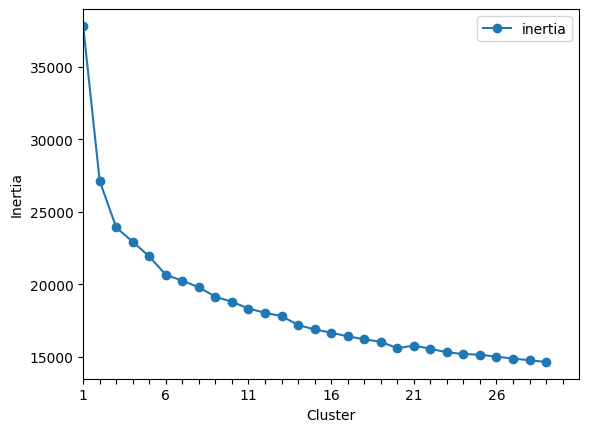

In [15]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,30,1))
ax.set_xlim(0,30)
ax.set(xlabel='Cluster', ylabel='Inertia');

In [16]:
km = KMeans(n_clusters=6, random_state=0)
km = km.fit(data_final)
cluster_labels = km.labels_
cluster_labels

array([3, 0, 1, ..., 2, 1, 0], shape=(2216,), dtype=int32)

In [17]:
user = df['ID']

In [18]:
def combine_cluster_labels(user_ids, labels):
    # Convert labels to a DataFrame
    labels_df = pd.DataFrame(labels)    
    # Merge user_ids DataFrame with labels DataFrame based on index
    cluster_df = pd.merge(user_ids, labels_df, left_index=True, right_index=True)
    # Rename columns to 'user' and 'cluster'
    cluster_df.columns = ['user', 'cluster']
    return cluster_df

cluster_df = combine_cluster_labels(user, cluster_labels)
cluster_df.head()

,user,cluster
0,5524,3
1,2174,0
2,4141,1
3,6182,5
4,5324,4


### Interpreation Clustering

In [19]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(data[['Education']])  

# Créer le DataFrame avec les bons noms de colonnes :
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Education']))

# Optionnel : concaténer avec le dataset original (sans la colonne d'origine)
data_clust = pd.concat([data.drop('Education', axis=1), encoded_df], axis=1)

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(data[['Marital_Status']])  

# Créer le DataFrame avec les bons noms de colonnes :
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Marital_Status']))

# Optionnel : concaténer avec le dataset original (sans la colonne d'origine)
data_clust = pd.concat([data.drop('Marital_Status', axis=1), encoded_df], axis=1)

data_clust = data_clust.drop('Education', axis = 1)
data_clust = data_clust.drop('Dt_Customer', axis = 1)
data_clust = data_clust.dropna()

In [20]:
data_final['Cluster'] = km.labels_
data_clust['Cluster'] = km.labels_

df_grouped = data_clust.groupby('Cluster').mean(numeric_only=True)
df_grouped.T


Cluster,0,1,2,3,4,5
Age,0.479184,0.428431,0.088120,-0.113693,0.048439,-0.828087
Income,-0.427927,0.355892,1.077783,0.858348,-0.103154,-0.911400
Kidhome,0.347129,-0.725916,-0.742911,-0.721182,0.796310,0.791607
Teenhome,0.784726,0.792388,-0.831078,-0.467014,0.694584,-0.919536
Recency,0.054083,-0.029698,0.063326,-0.047153,-0.061868,-0.034612
MntWines,-0.734824,0.698901,1.054873,0.642193,-0.008586,-0.816025
MntFruits,-0.563646,0.000073,0.309217,2.051922,-0.341502,-0.505787
MntMeatProducts,-0.643718,-0.060327,1.410456,1.146257,-0.290352,-0.630104
MntFishProducts,-0.580829,-0.070665,0.721364,1.712121,-0.322891,-0.518326
MntSweetProducts,-0.556127,-0.009728,0.471188,1.799533,-0.301388,-0.504251


In [21]:
results = []

for feature in df_grouped.columns:
    min_cluster = df_grouped[feature].idxmin()
    min_value = df_grouped[feature].min()
    max_cluster = df_grouped[feature].idxmax()
    max_value = df_grouped[feature].max()

    results.append({
        'feature': feature,
        'min_value': min_value,
        'min_cluster': min_cluster,
        'max_value': max_value,
        'max_cluster': max_cluster
    })

# Conversion en DataFrame
summary_df = pd.DataFrame(results)

# Affichage du résultat
summary_df

,feature,min_value,min_cluster,max_value,max_cluster
0,Age,-0.828087,5,0.479184,0
1,Income,-0.911400,5,1.077783,2
2,Kidhome,-0.742911,2,0.796310,4
3,Teenhome,-0.919536,5,0.792388,1
4,Recency,-0.061868,4,0.063326,2
5,MntWines,-0.816025,5,1.054873,2
6,MntFruits,-0.563646,0,2.051922,3
7,MntMeatProducts,-0.643718,0,1.410456,2
8,MntFishProducts,-0.580829,0,1.712121,3
9,MntSweetProducts,-0.556127,0,1.799533,3


Engineering

In [22]:
centroids = pd.DataFrame(km.cluster_centers_, columns=data_final.columns)

centroids.to_csv("cluster.csv", index=False)
# Voir les valeurs des centroïdes
print(centroids.T)

ValueError: Shape of passed values is (6, 31), indices imply (6, 32)

In [ ]:
clust = pd.read_csv('cluster.csv')
#clust.mean().sort_values(ascending=False).head(10)
clust

In [ ]:
from sklearn.feature_selection import f_classif

# Les labels de cluster sont nos "classes"
labels = km.labels_

# F-statistique et p-valeurs
F, p = f_classif(data_final, labels)

# Les features avec les F-scores les plus élevés sont les plus discriminantes
feature_importance = pd.Series(F, index=data_final.columns).sort_values(ascending=False)
print(feature_importance)

## PCA

In [ ]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = data_final.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
n_components = 1

while True:
   
    pca = PCA(n_components=n_components)
    pca.fit(data_final)
    
    # Calculer la somme des ratios de variance expliquée
    variance = pca.explained_variance_ratio_.sum()
    
    # Vérifier si la variance expliquée est supérieure ou égale à 90%
    if variance >= 0.90:
        break  # Sortir de la boucle si la condition est remplie
    else:
        n_components += 1  # Augmenter le nombre de composantes et continuer la boucle

# Afficher le nombre de composantes retenues
print(f"Nombre de composantes principales nécessaires pour expliquer au moins 90% de la variance : {n_components}")
print(variance)

In [ ]:
import matplotlib.pyplot as plt

# Calcul de la variance expliquée cumulée
cumulative_variance_ratios = []

for n in range(1, 15):
    pca = PCA(n_components=n)
    pca.fit(data_final)
    cumulative_variance_ratios.append(pca.explained_variance_ratio_.sum())

# Création du barplot
plt.figure(figsize=(10, 6))
plt.bar(x=range(1, 15), height=cumulative_variance_ratios, color='skyblue', edgecolor='black')

# Ligne horizontale à 90%
plt.axhline(y=0.9, color='red', linestyle='--', label='Seuil 90%')

# Ajout de détails
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.title("Évolution de la variance expliquée cumulée (PCA)")
plt.xticks(range(1, 15))
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
pca = PCA(n_components=14)
components = pca.fit_transform(data_final)

# Contributions des features aux composantes
print(pd.Series(pca.components_[0], index=data_final.columns).sort_values(ascending=False))

## KMEANS X PCA

In [ ]:
pca = PCA(n_components=14)
X_pca = pca.fit_transform(data_final)

kmeans = KMeans(n_clusters=14, random_state=0)
labels = kmeans.fit_predict(X_pca)


In [ ]:

km_list = list()

for clust in range(1,30):
    kmeans = KMeans(n_clusters=clust, random_state=0)
    kmeans = kmeans.fit(X_pca)
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': kmeans.inertia_,
                              'model': kmeans}))

In [ ]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,30,1))
ax.set_xlim(0,30)
ax.set(xlabel='Cluster', ylabel='Inertia');

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_pca, labels)
print(f"Silhouette score après PCA : {score:.4f}")

In [ ]:
Visualisation 2D (si PCA ≥ 2)
if X_pca.shape[1] >= 2:
    df_visu = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
    df_visu['Cluster'] = labels
    sns.scatterplot(data=df_visu, x='PC1', y='PC2', hue='Cluster', palette='Set2')
    plt.title("Clusters K-Means après PCA")
    plt.show()

## DBSCAN

In [ ]:
def dbscan_gridsearch_full(data, eps_values=np.arange(0.1, 2.0, 0.1), min_samples_values=range(3, 10), target_score=0.5):
    results = []
    best_config = None
    best_score = -1
    best_labels = None

    for eps in eps_values:
        for min_samples in min_samples_values:
            db = DBSCAN(eps=eps, min_samples=min_samples)
            labels = db.fit_predict(data)

            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            if n_clusters < 2:
                continue

            try:
                score = silhouette_score(data, labels)
                results.append((eps, min_samples, score, n_clusters))

                if score > best_score:
                    best_score = score
                    best_config = (eps, min_samples)
                    best_labels = labels

                print(f"eps={eps:.2f}, min_samples={min_samples} → score={score:.4f} | clusters={n_clusters}")
            except:
                continue

    # Résumé final
    print("\n🧾 Grid Search terminé.")
    if best_score >= target_score:
        print(f"🎯 Objectif atteint ! Silhouette = {best_score:.4f} avec eps={best_config[0]:.2f}, min_samples={best_config[1]}")
    else:
        print(f"⚠️ Aucun couple n’a dépassé le seuil {target_score}. Meilleur score = {best_score:.4f} avec eps={best_config[0]:.2f}, min_samples={best_config[1]}")

    return best_config, best_score, best_labels, pd.DataFrame(results, columns=["eps", "min_samples", "score", "n_clusters"])

best_eps, best_score, labels, df_results = optimal_eps_dbscan(data_final, min_samples=10)


plt.plot(df_results["eps"], df_results["silhouette"], marker='o')
plt.xlabel("eps")
plt.ylabel("Silhouette score")
plt.title("Performance de DBSCAN selon eps")
plt.grid()
plt.show()

In [ ]:
# Définition des plages de paramètres à tester
eps_values = np.arange(0.1, 20, 0.1)
min_samples_values = range(2, 30)

# Stockage des résultats
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(data_final)
        
        # Vérifie qu'on a plus d'un cluster (et pas juste -1 = bruit)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(data_final, labels)
        else:
            score = -1  # score invalide si 1 cluster ou bruit uniquement
        
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'silhouette': score
        })

# Recherche du meilleur résultat
best_result = max(results, key=lambda x: x['silhouette'])

print("Meilleur score silhouette :", best_result['silhouette'])
print("Paramètres optimaux : eps =", best_result['eps'], ", min_samples =", best_result['min_samples'])

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Choisir le même min_samples que prévu pour DBSCAN
min_samples = 5

neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(data_final)
distances, indices = neighbors_fit.kneighbors(data_final)

# Trie les distances les plus grandes (k-ième voisin)
k_distances = np.sort(distances[:, -1])

# Plot
plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.ylabel("Distance au {}ème plus proche voisin".format(min_samples))
plt.xlabel("Points triés")
plt.title("k-distance graph pour estimer eps")
plt.grid()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

# 2. DBSCAN
dbscan = DBSCAN(eps=7.5, min_samples=2)  
labels = dbscan.fit_predict(data_final)

# 3. Nombre de clusters trouvés (hors bruit)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"Clusters détectés : {n_clusters}")
print(f"Points considérés comme bruit : {n_noise}")

# 4. Silhouette score (si au moins 2 clusters détectés)
if n_clusters > 1:
    score = silhouette_score(data_final, labels)
    print(f"Silhouette Score : {score:.4f}")
else:
    print("Pas assez de clusters pour calculer un silhouette score.")


## Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 1. Tracer le Dendrogramme pour voir les distances de fusion entre clusters
linked = linkage(data_final, method='ward')  # 'ward' minimise la variance des clusters

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogramme pour le Clustering Hiérarchique")
plt.xlabel("Index des points")
plt.ylabel("Distance")
plt.show()

# 2. Appliquer l'Agglomerative Clustering avec un nombre de clusters choisi (par exemple 3)
n_clusters = 3
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = hierarchical.fit_predict(data_final)

# 3. Visualisation des résultats (si 2 dimensions pour projection avec PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_final)

df_visu = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_visu['Cluster'] = labels

sns.scatterplot(data=df_visu, x='PC1', y='PC2', hue='Cluster', palette='Set2', legend='full')
plt.title("Clustering Hiérarchique")
plt.show()

# Affichage des labels de clusters
print("Labels de clusters : ", labels)

## GMM

In [ ]:
from sklearn.mixture import GaussianMixture

# 1. Appliquer le GMM avec un nombre de clusters (par exemple 3)
n_clusters = 3
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=0)
gmm.fit(data_final)

# 2. Prédire les labels (assignation des points aux clusters)
labels = gmm.predict(data_final)

# 3. Visualiser les résultats avec PCA pour réduire à 2D (si données à plus de 2 dimensions)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_final)

df_visu = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_visu['Cluster'] = labels

# Visualisation des clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_visu, x='PC1', y='PC2', hue='Cluster', palette='Set2', legend='full')
plt.title("Gaussian Mixture Model - Clustering")
plt.show()

# 4. Visualisation des probabilités d'appartenance
probs = gmm.predict_proba(data_final)

# Affichage des probabilités d'appartenance des 10 premiers points aux clusters
print("Probabilités d'appartenance des 10 premiers points :")
print(probs[:10])

# 5. Afficher les moyennes des gaussiennes (centroïdes) et les covariances
print("\nMoyennes des Gaussiennes (Centroids) :")
print(gmm.means_)

print("\nCovariances des Gaussiennes :")
print(gmm.covariances_)

# Autre code 

## Preprocessing

In [24]:
data = pd.read_csv("/home/lucas/.cache/kagglehub/datasets/imakash3011/customer-personality-analysis/versions/1/marketing_campaign.csv", sep = '\t')


In [25]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

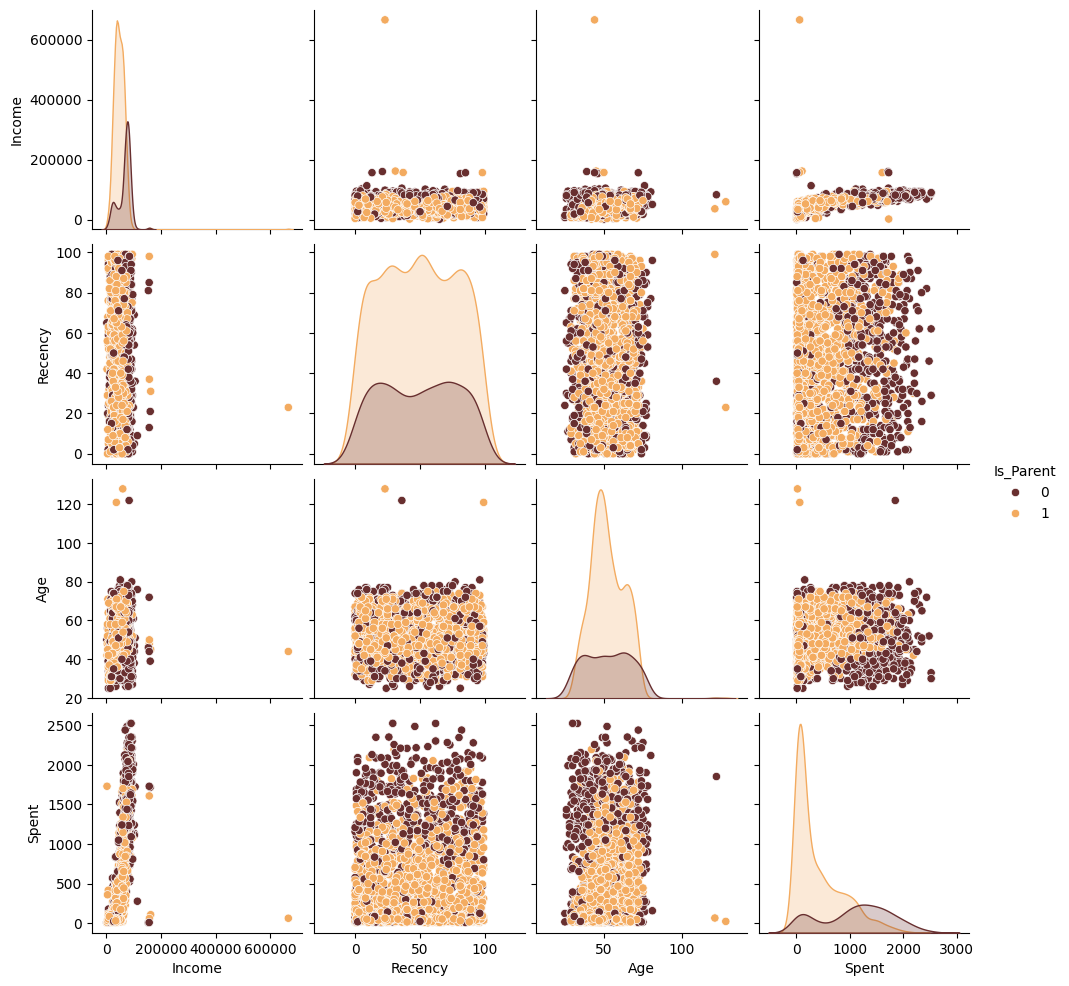

In [26]:
#Plotting following features
To_Plot = [ "Income", "Recency", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

In [27]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


In [28]:
from sklearn.preprocessing import LabelEncoder

s = (data.dtypes == 'object')
object_cols = list(s[s].index)

LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)


In [29]:
#Creating a copy of data
ds = data.copy()

# Suppression colonnes
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns)


## PCA

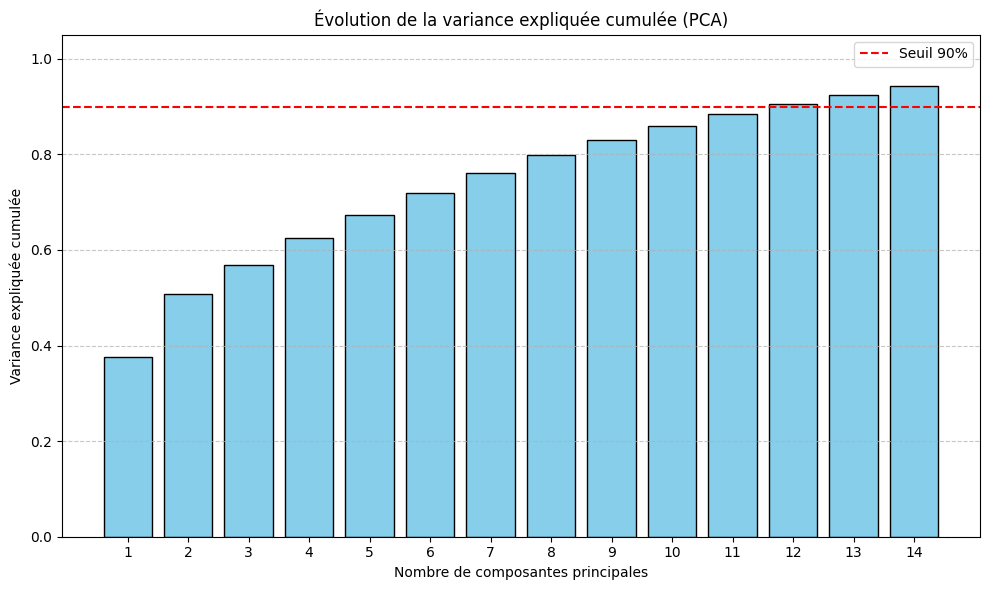

In [30]:
# Calcul de la variance expliquée cumulée
cumulative_variance_ratios = []

for n in range(1, 15):
    pca = PCA(n_components=n)
    pca.fit(scaled_ds)
    cumulative_variance_ratios.append(pca.explained_variance_ratio_.sum())

# Création du barplot
plt.figure(figsize=(10, 6))
plt.bar(x=range(1, 15), height=cumulative_variance_ratios, color='skyblue', edgecolor='black')

# Ligne horizontale à 90%
plt.axhline(y=0.9, color='red', linestyle='--', label='Seuil 90%')

# Ajout de détails
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.title("Évolution de la variance expliquée cumulée (PCA)")
plt.xticks(range(1, 15))
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

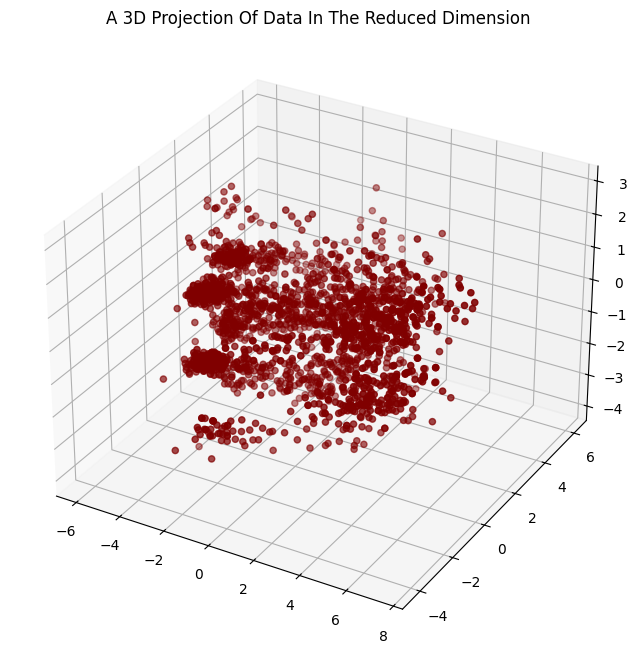

In [31]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
data_pca = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))

#A 3D Projection Of Data In The Reduced Dimension
x =data_pca["col1"]
y =data_pca["col2"]
z =data_pca["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Clustering

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

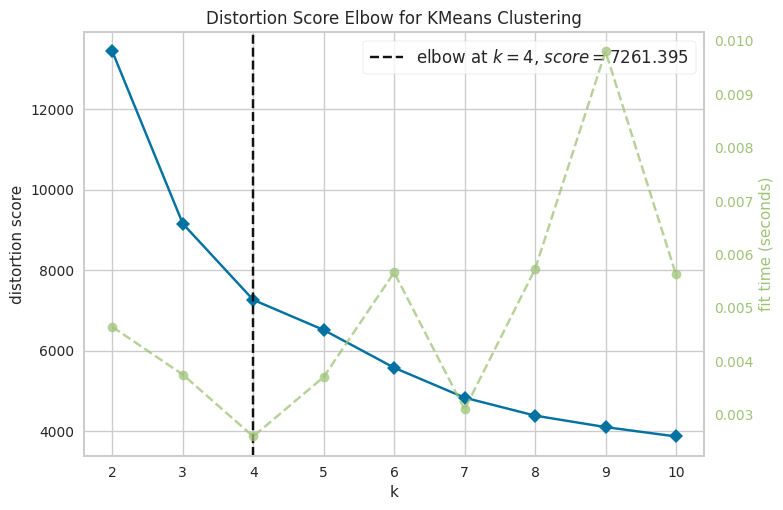

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
from yellowbrick.cluster import KElbowVisualizer
# Elbow method

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_pca)
Elbow_M.show()

In [40]:
from matplotlib import colors
from matplotlib.colors import ListedColormap

# CLustering Kmeans
km = KMeans(n_clusters=4, random_state=0)
km = km.fit(data_pca)
cluster_labels = km.labels_

# Fit model and predict clusters
yhat_km = km.fit_predict(data_pca)
data_pca["Clusters_Km"] = yhat_km

#Adding the Clusters feature to the orignal dataframe.
data["Clusters_Km"]= yhat_km
'''
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=data_pca["Clusters_Km"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()
'''

'\n#Plotting the clusters\nfig = plt.figure(figsize=(10,8))\nax = plt.subplot(111, projection=\'3d\', label="bla")\nax.scatter(x, y, z, s=40, c=data_pca["Clusters_Km"], marker=\'o\', cmap = cmap )\nax.set_title("The Plot Of The Clusters")\nplt.show()\n'

In [42]:
from sklearn.cluster import AgglomerativeClustering
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)

# Fit model and predict clusters
yhat_AC = AC.fit_predict(data_pca)
data_pca["Clusters_AC"] = yhat_AC

#Adding the Clusters feature to the orignal dataframe.
data["Clusters_AC"]= yhat_AC

'''
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=data_pca["Clusters_AC"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()
'''

'\n#Plotting the clusters\nfig = plt.figure(figsize=(10,8))\nax = plt.subplot(111, projection=\'3d\', label="bla")\nax.scatter(x, y, z, s=40, c=data_pca["Clusters_AC"], marker=\'o\', cmap = cmap )\nax.set_title("The Plot Of The Clusters")\nplt.show()\n'

## Evaluation and Interpretation

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters_AC"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [ ]:
df_grouped = data.groupby('Clusters_Km').mean(numeric_only=True)
df_grouped.T

In [ ]:
df_grouped = data.groupby('Clusters_AC').mean(numeric_only=True)
df_grouped.T

In [43]:
score = silhouette_score(data_pca, AC.labels_)
score

np.float64(0.4990854371294168)